In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
folderpath = "share_h/output/"
# folderpath = "output_x86/"
# folderpath = "output2_ARM/"
def getEverything(folderpath):
    loadsFile = folderpath+"loads.txt"
    instructionsFile = folderpath+"instructions.txt"
    transactionsFile = folderpath+"transactions.txt"
    idleinstructionsFile = folderpath+"idleinstructions.txt"
    cpuutilfile = folderpath + "cpuutilactual.txt"
    with open(cpuutilfile) as f:
        cpuutilsall = f.read().split('-')[1:]
    # print cpuutilsall
    cpuUtilsLists = []
    for x in cpuutilsall:
        x_float = map(float,x.split('\n')[1:-1])
        if(len(x_float)==0):
            continue
        cpuUtilsLists.append(x_float[0:4])
    #     print((len(cpuUtilsLists)))
    # print cpuUtilsLists
    with open(loadsFile) as f:
        loadsStr = f.read().split('\n')[:-1]
    with open(instructionsFile) as f:
        instructionsStr = f.read().split('\n')[:-1]
    with open(transactionsFile) as f:
        transactionsStr = f.read().split('\n')[:-1]
    with open(idleinstructionsFile) as f:
        idleinstructionsStr = f.read().split('\n')[:-1]
    loads = np.array(map(float, loadsStr))
    instructionsStr2 = [x.replace(',','') for x in instructionsStr]
    instructionsStr = instructionsStr2
    idleinstructionsStr2 = [x.replace(',','') for x in idleinstructionsStr]
    idleinstructionsStr = idleinstructionsStr2
    instructions = np.array(map(float,instructionsStr))
    transactions = np.array(map(float,transactionsStr))
    idleinstructions = np.array(map(float,idleinstructionsStr))
    # print loads
    # print instructions
    # print transactions
    # print("IDLE")
    # print idleinstructions
    # ipl = instructions/loads
    ipt = instructions/transactions
    # print ipl
    # print ipt
    wrong = idleinstructions/instructions
    idlePerTransaction = idleinstructions/transactions
    # print(cpuUtilsLists)
    cpuUtilAvg = []
    cpuUtilMax = []
    cpuUtilMin = []
    
    for x in cpuUtilsLists:
    #     print('----------')
    #     print(x)
        cpuUtilAvg.append( np.mean(x))
        cpuUtilMax.append( np.max(x))
        cpuUtilMin.append( np.min(x))
    # cpuUtilAvg = np.mean(cpuUtilsLists,axis=1)
    # cpuUtilMax = np.max(cpuUtilsLists,axis=1)
    # cpuUtilMin = np.min(cpuUtilsLists,axis=1)
    # print(len(cpuUtilsLists))
    # print(len(cpuUtilAvg))
    # print(cpuUtilAvg)
    # print(cpuUtilMax)
    output = {
        "avgUtil":cpuUtilAvg,
        "maxUtil":cpuUtilMax,
        "minUtil":cpuUtilMin,
        "idlePerTransaction":idlePerTransaction,
        "ipt":ipt,
        "transactions":transactions,
        "loads":loads,
        "utils":cpuUtilsLists,
        "instructions":instructions
    }
    return output
def utilGraph(our_dict,title,lowe=None,upper=None):
    plt.figure(1)
    plt.xlabel("Connections")
    plt.ylabel("CPU UTIL (%)")
    loads = our_dict["loads"]
    cpuUtilMax = our_dict["maxUtil"]
    cpuUtilMin = our_dict["minUtil"]
    cpuUtilAvg = our_dict["avgUtil"]
    plt.plot(loads,cpuUtilAvg[0:len(loads)],label="average", marker = ".")
    plt.plot(loads,cpuUtilMax[0:len(loads)],label="max", marker = ".")
    plt.plot(loads,cpuUtilMin[0:len(loads)],label="min", marker = ".")
    plt.legend()
    plt.title(title)
    plt.show()
def utilGraphAvgStd(our_dict,title,savefig=None,lowe=None,upper=None):
    plt.figure(1)
    plt.xlabel("Connections")
    plt.ylabel("CPU UTIL (%)")
    loads = our_dict["loads"]
    cpuUtilMax = our_dict["maxUtilAvg"]
    cpuUtilMin = our_dict["minUtilAvg"]
    cpuUtilAvg = our_dict["avgUtilAvg"]
    cpuUtilMaxStd = our_dict["maxUtilStd"]
    cpuUtilMinStd = our_dict["minUtilStd"]
    cpuUtilAvgStd = our_dict["avgUtilStd"]
    
    plt.errorbar(loads,cpuUtilAvg[0:len(loads)],yerr=cpuUtilAvgStd, label="average", marker = ".")
    plt.errorbar(loads,cpuUtilMax[0:len(loads)],yerr=cpuUtilMaxStd, label="max", marker = ".")
    plt.errorbar(loads,cpuUtilMin[0:len(loads)],yerr=cpuUtilMinStd, label="min", marker = ".")
    plt.legend()
    plt.title(title)
    if savefig is not None:
        plt.savefig(savefig)
    plt.show()
def iptGraph(our_dict,title,lowe=None,upper=None):
    plt.figure(1)
    plt.errorbar(our_dict["transactions"],our_dict["ipt"],fmt='o',yerr = our_dict["idlePerTransaction"])
#     plt.ylim(ymin=0)
    plt.ylabel("User Instruction per Transaction")
    plt.xlabel("Transactions")
    plt.title(title)
    plt.show()
def tpc(our_dict,title,lowe=None,upper=None):
    plt.figure(1)
    plt.plot(our_dict["loads"],our_dict["transactions"],'s')
    plt.ylabel("Transactions")
    plt.xlabel("Connections")
    plt.title(title)
    plt.show()
# def appendCorrect(ourList,index,value):
#     ourList


def tpc(our_dict,title,lowe=None,upper=None):
    plt.figure(1)
    plt.plot(our_dict["loads"],our_dict["transactions"],'s')
    plt.ylabel("Transactions")
    plt.xlabel("Connections")
    plt.title(title)
    plt.show()
def tpcAvgStd(our_dict,title,savefig=None,lowe=None,upper=None):
    plt.figure(1)
    plt.errorbar(our_dict["loads"],our_dict["transactionsAvg"],yerr = our_dict["transactionsStd"],marker = ".")
    plt.ylabel("Transactions")
    plt.xlabel("Connections")
    plt.title(title)
    if savefig is not None:
        plt.savefig(savefig)
    plt.show()
def iptVsCAvgStd(our_dict,title,savefig=None,ymin=None):
    plt.figure(1)
    plt.errorbar(our_dict["loads"],our_dict["iptAvg"],yerr = our_dict["iptStd"],marker=".")
    plt.xlabel("Connections")
    plt.ylabel("User Instructions per transaction")
    if ymin is not None:
        plt.ylim(ymin=0)
    plt.title(title)
    if savefig is not None:
        plt.savefig(savefig)
    plt.show()
def avgAndStd(our_dict):

#     idleInstructionsList = {}
    load_list = []
    load_index = {}
    for load in our_dict["loads"]:
        if load not in load_list:
            load_list.append(load)
            load_index[load] = len(load_list) - 1
    cpuUtilMaxList = [[] for i in range(len(load_list))]
    cpuUtilMinList = [[] for i in range(len(load_list))]
    cpuUtilAvgList = [[] for i in range(len(load_list))]
    transactionsList = [[] for i in range(len(load_list))]
    instructionsList = [[] for i in range(len(load_list))]
    iptList = [[] for i in range(len(load_list))]
#     print(cpuUtilMaxList)
    for load,maxUtil,minUtil,avgUtil,transactions,instructions,ipt in zip(our_dict["loads"],our_dict["maxUtil"],our_dict["minUtil"],our_dict["avgUtil"],our_dict["transactions"],our_dict["instructions"],our_dict["ipt"]):
#         print(load_index[load])
        cpuUtilMaxList[load_index[load]].append(maxUtil)
        cpuUtilMinList[load_index[load]].append(minUtil)
        cpuUtilAvgList[load_index[load]].append(avgUtil)
        transactionsList[load_index[load]].append(transactions)
        instructionsList[load_index[load]].append(instructions)
        iptList[load_index[load]].append(ipt)
        
#     print(cpuUtilMaxList)
    cpuUtilMaxAvg = [np.mean(x) for x in cpuUtilMaxList]
    cpuUtilMaxStd = [np.std(x) for x in cpuUtilMaxList]
    cpuUtilMinAvg = [np.mean(x) for x in cpuUtilMinList]
    cpuUtilMinStd = [np.std(x) for x in cpuUtilMinList]
    cpuUtilAvgAvg = [np.mean(x) for x in cpuUtilAvgList]
    cpuUtilAvgStd = [np.std(x) for x in cpuUtilAvgList]
    transactionsAvg = [np.mean(x) for x in transactionsList]
    transactionsStd = [np.std(x) for x in transactionsList]
    instructionsAvg = [np.mean(x) for x in instructionsList]
    instructionsStd = [np.std(x) for x in instructionsList]
    iptVar = [scipy.stats.variation(x) for x in iptList]
    iptAvg = [np.mean(x) for x in iptList]
    iptStd = [np.std(x) for x in iptList]
    output_dict = {
        "loads":load_list,
        "maxUtilAvg":cpuUtilMaxAvg,
        "maxUtilStd": cpuUtilMaxStd,
        "minUtilAvg":cpuUtilMinAvg,
        "minUtilStd": cpuUtilMinStd,
        "avgUtilAvg":cpuUtilAvgAvg,
        "avgUtilStd": cpuUtilAvgStd,
        "transactionsAvg":transactionsAvg,
        "transactionsStd": transactionsStd,
        "instructionsAvg":instructionsAvg,
        "instructionsStd": instructionsStd,
        "iptAvg":iptAvg,
        "iptStd":iptStd,
        "iptVar":iptVar
    }
    return output_dict
        
def variationIPT(our_dict,title):
    plt.figure(1)
    plt.plot(our_dict["loads"],our_dict["iptVar"])
    plt.xlabel("Connections")
    plt.ylabel("Coefficient of Variation Instructions per Transaction")
    plt.title(title)
    plt.show()

In [6]:
# our_dict = getEverything("output_x86/")
# avgAndStd(our_dict)
# utilGraph(our_dict,"x86")
# iptGraph(our_dict,"x86")
# tpc(our_dict,"x86")
# variationInstructions(our_dict,"x86")
# our_dict = getEverything("share_h/output/")
# utilGraph(our_dict,"ARM")
# iptGraph(our_dict,"ARM")
# tpc(our_dict,"ARM")


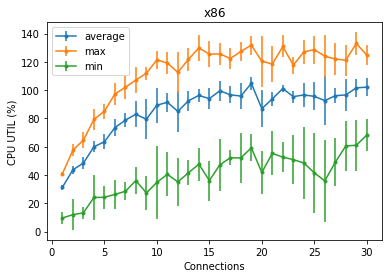

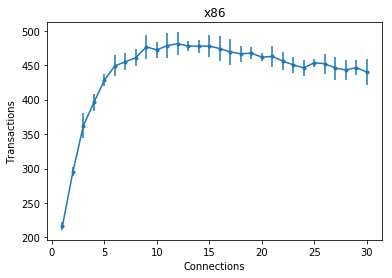

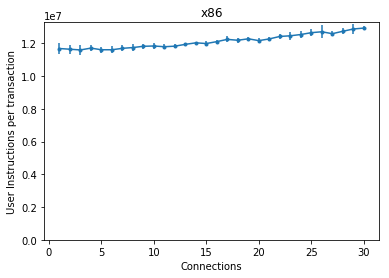

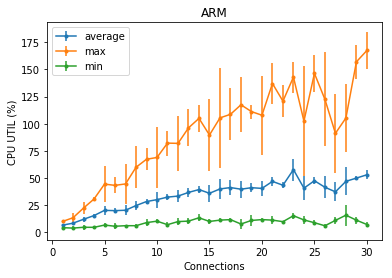

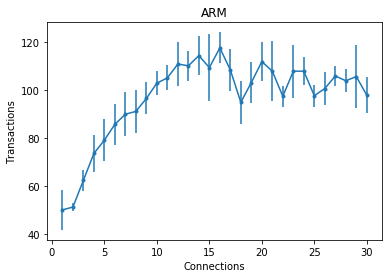

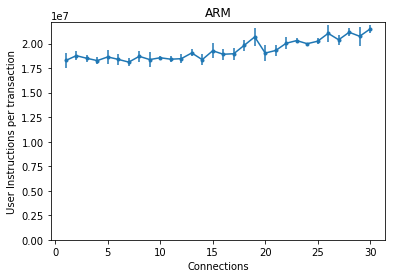

In [21]:
ymin = 0
our_dict = getEverything("output_x86/")
new_dict = avgAndStd(our_dict)

utilGraphAvgStd(new_dict,"x86",savefig="x86_uti.png")
tpcAvgStd(new_dict,"x86",savefig="x86_tpc.png")
iptVsCAvgStd(new_dict,"x86",ymin=ymin,savefig="x86_ipt.png")
# variationIPT(new_dict,"x86")
our_dict = getEverything("share_h/output/")
new_dict = avgAndStd(our_dict)

utilGraphAvgStd(new_dict,"ARM",savefig="ARM_uti.png")
tpcAvgStd(new_dict,"ARM",savefig="ARM_tpc.png")
iptVsCAvgStd(new_dict,"ARM",ymin=ymin,savefig="ARM_ipt.png")


5
5
5
5
5


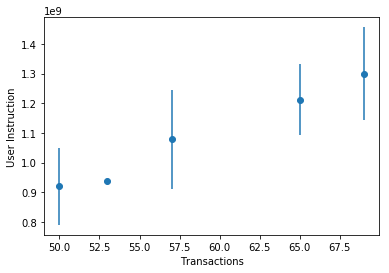

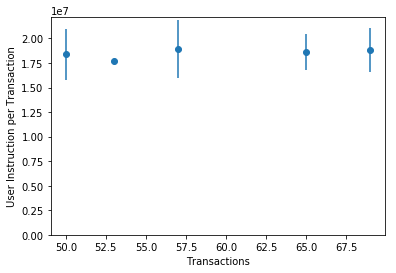

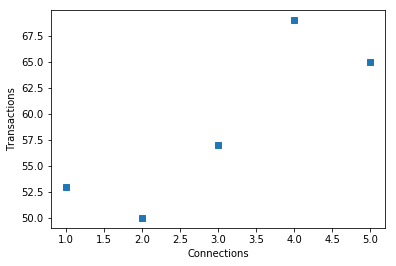

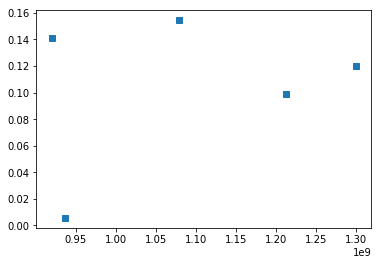

In [325]:

# plt.figure(1)
# plt.plot(loads,instructions,'s')
# plt.ylabel("User Instruction")
# plt.xlabel("connections")
# plt.figure(2)
# plt.plot(loads,ipl,'s')
# plt.ylabel("User Instruction per Client")
# plt.xlabel("connections")
print(len(idleinstructions))
print(len(instructions))
print(len(transactions))
print(len(ipt))
print(len(idlePerTransaction))
plt.figure(3)
plt.errorbar(transactions,instructions,fmt='o',yerr = idleinstructions)
plt.ylabel("User Instruction")
plt.xlabel("Transactions")
plt.figure(4)
plt.errorbar(transactions,ipt,fmt='o',yerr = idlePerTransaction)
plt.ylim(ymin=0)
plt.ylabel("User Instruction per Transaction")
plt.xlabel("Transactions")

plt.figure(5)
plt.plot(loads,transactions,'s')
plt.ylabel("Transactions")
plt.xlabel("Connections")
# plt.show()

plt.figure(6)
plt.plot(instructions,wrong,'s')
plt.ylabel("")
plt.xlabel("")
plt.show()